In [1]:
# data analysis stack
import pandas as pd
import numpy as np

# data pre-processing stack
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, PolynomialFeatures
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline

# machine learning stack
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor


# data visualization stack
import matplotlib.pyplot as plt
import seaborn as sns

# miscellaneous
import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Get a list of column names (excluding 'bmi')
columns = df.columns[:-1].to_list()
columns.remove("bmi")

# Display unique values for each column (excluding 'bmi')
for i in columns:
    unique_values = df[i].unique()

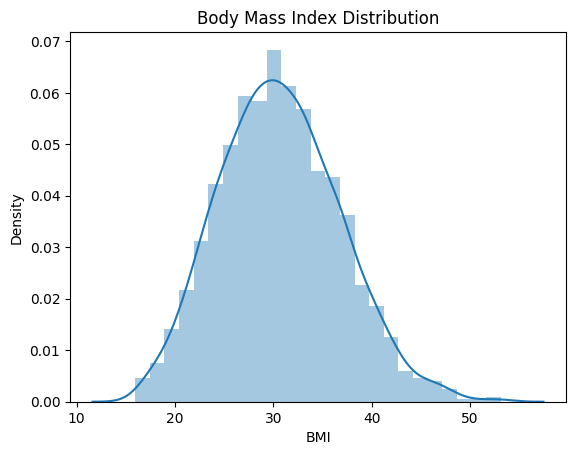

In [5]:
sns.distplot(df["bmi"], kde=True)
plt.title('Body Mass Index Distribution')
plt.xlabel("BMI")
plt.show();

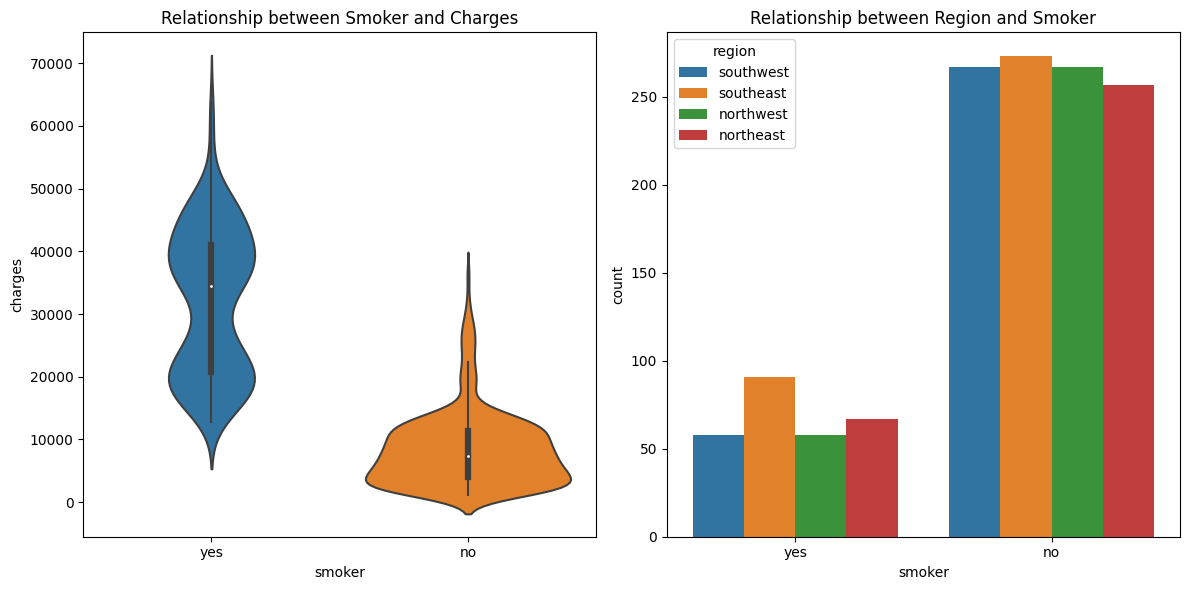

In [6]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='smoker', y='charges', data=df)
plt.title('Relationship between Smoker and Charges')

plt.subplot(1, 2, 2)
sns.countplot(x='smoker', hue='region', data=df)
plt.title('Relationship between Region and Smoker')

plt.tight_layout()

plt.show()

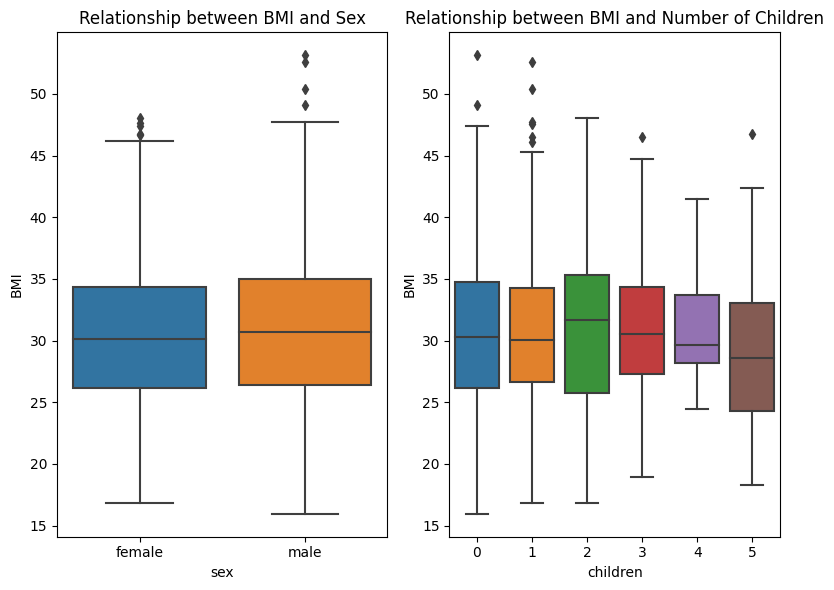

In [7]:
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='sex', y='bmi', data=df)
plt.title('Relationship between BMI and Sex')
plt.ylabel('BMI')

plt.subplot(1, 2, 2)
sns.boxplot(x='children', y='bmi', data=df)
plt.title('Relationship between BMI and Number of Children')
plt.ylabel('BMI')

plt.tight_layout()

plt.show()

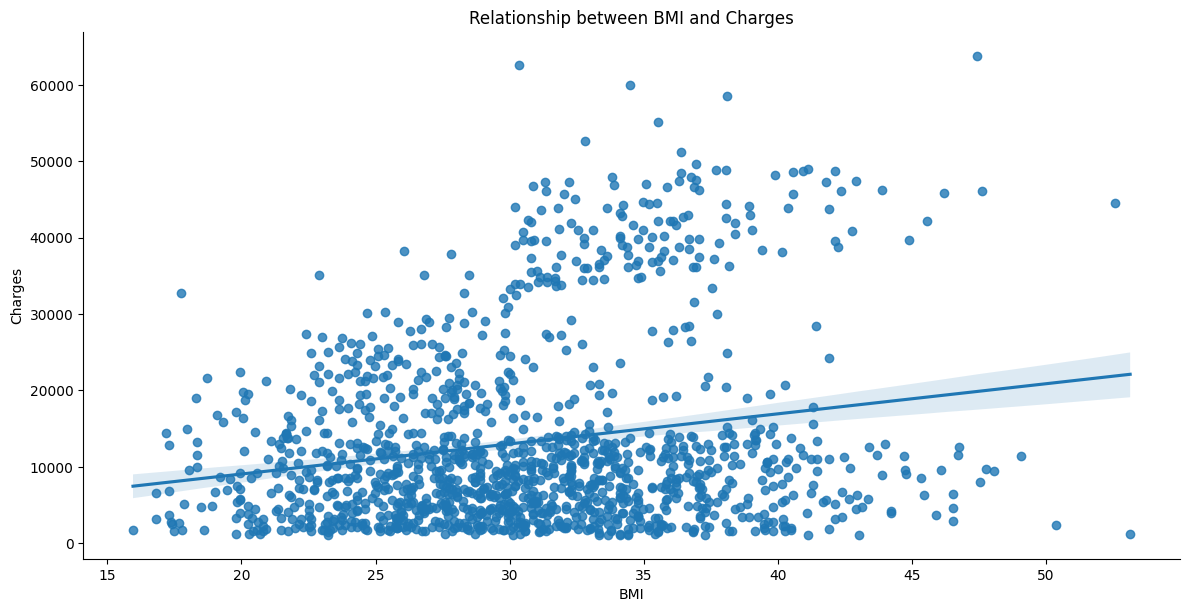

In [8]:
sns.lmplot(x='bmi',y='charges',data=df,aspect=2,height=6)
plt.title('Relationship between BMI and Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

plt.show()

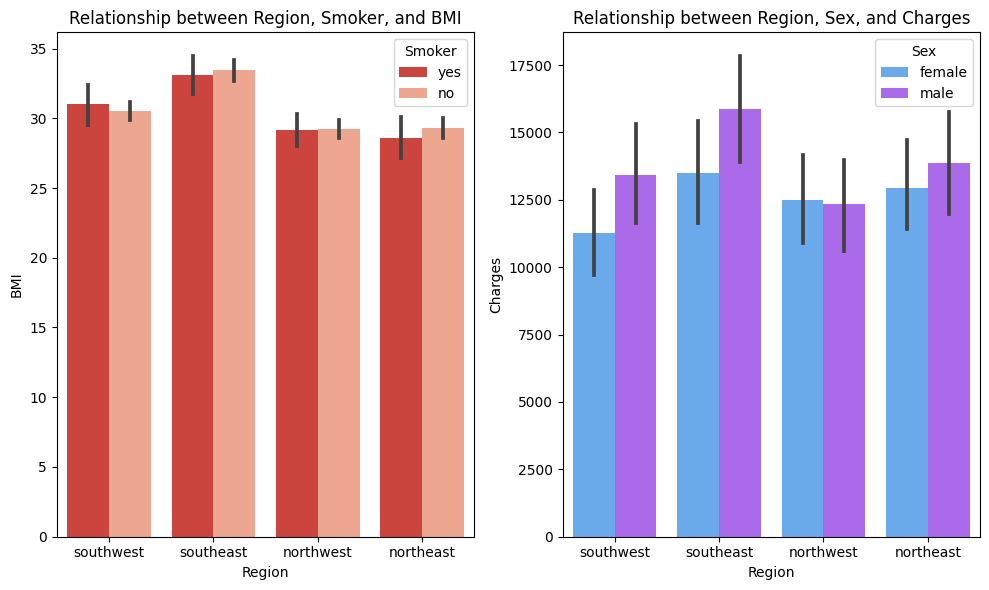

In [9]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.barplot(x="region", y="bmi", hue="smoker", data=df, palette='Reds_r')
plt.title('Relationship between Region, Smoker, and BMI')
plt.xlabel('Region')
plt.ylabel('BMI')
plt.legend(title='Smoker', loc="upper right")

plt.subplot(1, 2, 2)
sns.barplot(x="region", y="charges", hue="sex", data=df, palette='cool')
plt.title('Relationship between Region, Sex, and Charges')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.legend(title='Sex', loc="upper right")

plt.tight_layout()
plt.show()

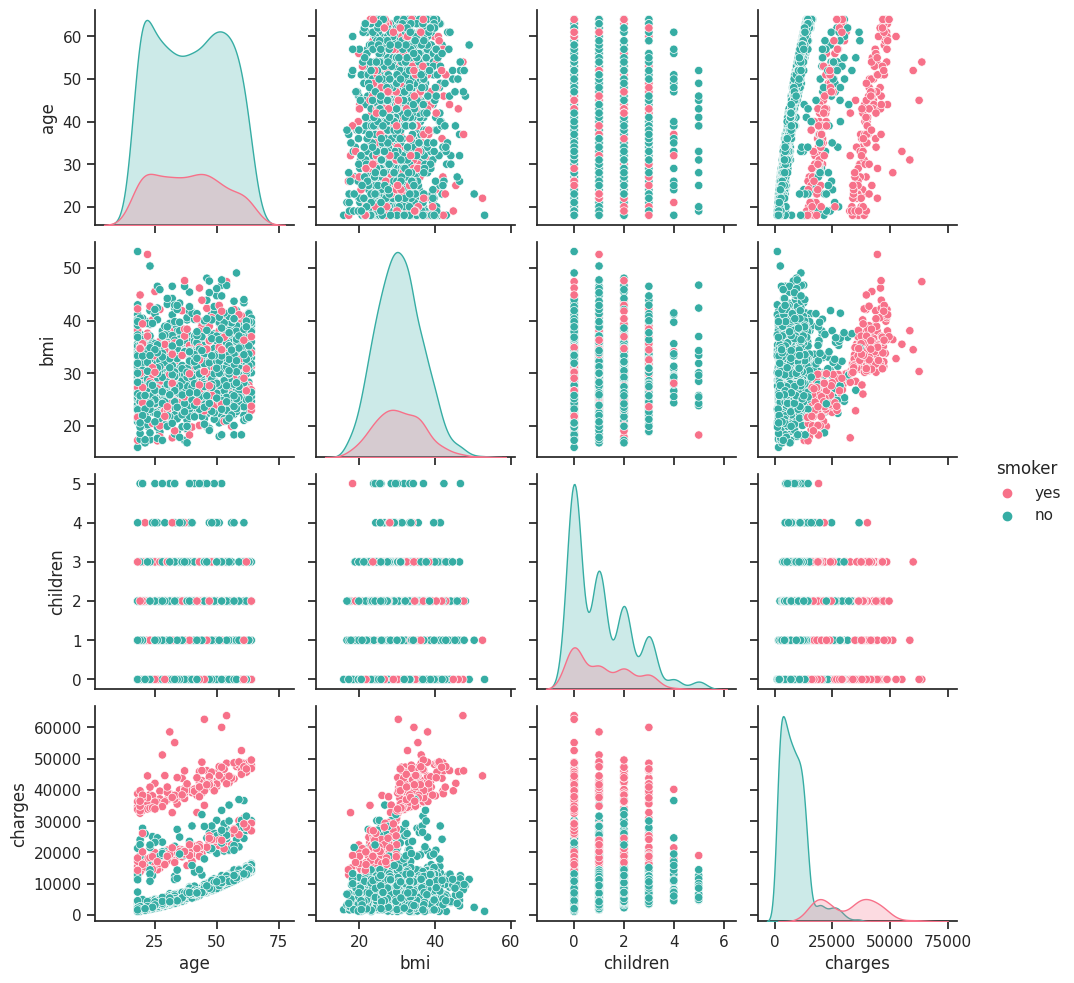

In [10]:
# Scatterplot matrix visualization
sns.set(style="ticks")
sns.pairplot(df, vars=["age", "bmi", "children", "charges"], hue="smoker", palette="husl")
plt.show()

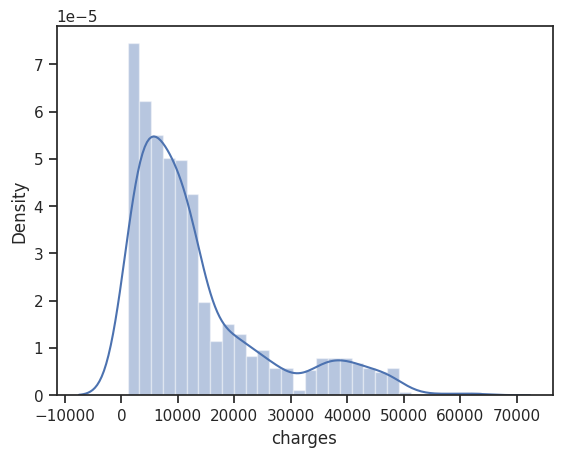

In [11]:
fig,axes=plt.subplots(1,1)
sns.distplot(df["charges"]);

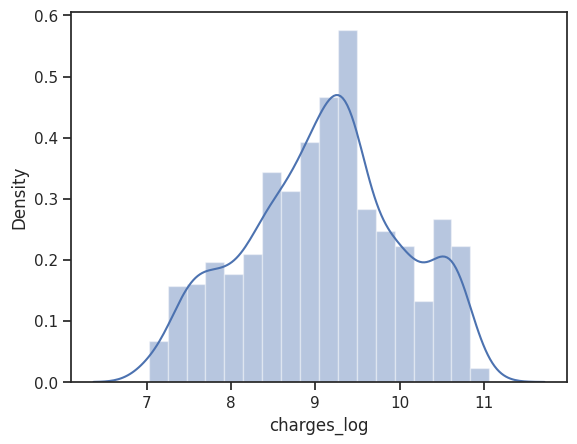

In [12]:
# Distribution transformation
df["charges_log"] = np.log1p(df["charges"])
sns.distplot(df["charges_log"]);

In [13]:
# Create a OneHotEncoder instance
one_hot_encoder = OneHotEncoder(drop='first')
categorical_columns = ['sex', 'smoker', 'region', "children"]

# Fit and transform the categorical columns
encoded_features = one_hot_encoder.fit_transform(df[categorical_columns]).toarray()

# Get feature names after encoding
encoded_column_names = one_hot_encoder.get_feature_names_out(input_features=categorical_columns)

# Create a DataFrame with the encoded features and concatenate it with the original DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoded_column_names)
df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded

,age,sex,bmi,children,smoker,region,charges,charges_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_1,children_2,children_3,children_4,children_5
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,18,male,33.770,1,no,southeast,1725.55230,7.453882,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,8.400763,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,9.998137,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,8.260455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268755,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,7.699381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,7.396847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,7.605365,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


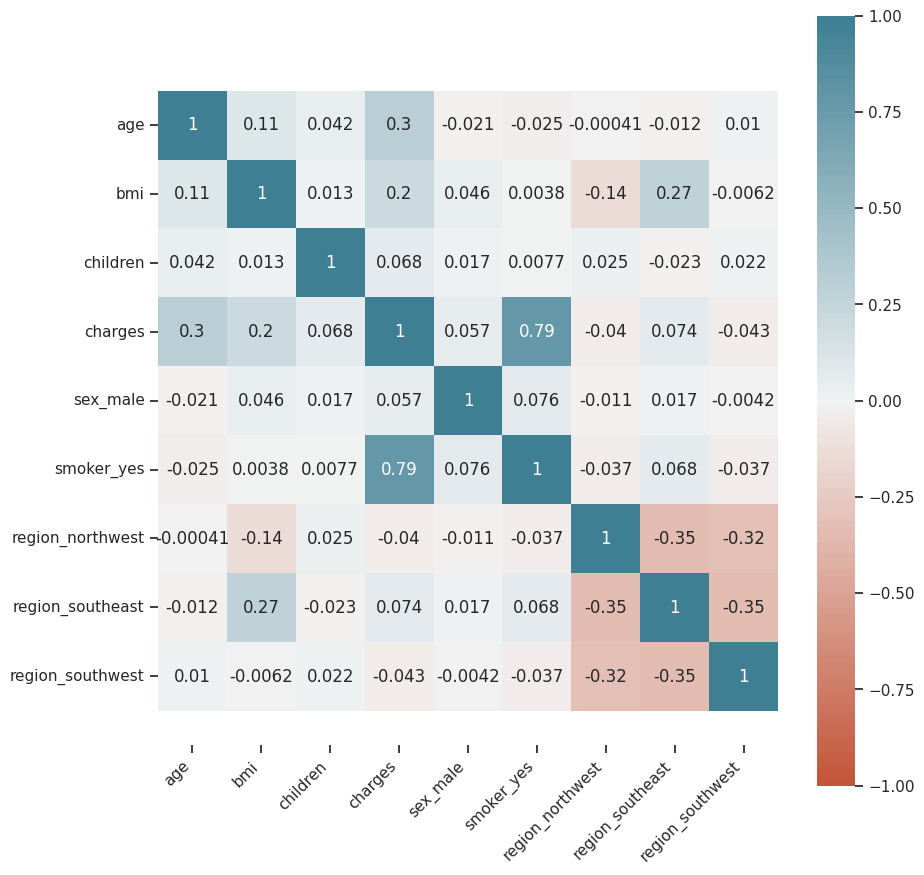

In [14]:
# Correlation heatmap
corr = df_encoded[["age", "bmi", "children", "charges", "sex_male", "smoker_yes", "region_northwest", "region_southeast", "region_southwest"]].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5)
plt.show()

In [15]:
# Columns to be scaled
columns_to_scale = ["age", "bmi"]

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Apply MinMaxScaler to selected columns
df_encoded[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])
df_encoded = df_encoded.drop(columns=["sex", "smoker", "region", "charges"])
df_encoded

,age,bmi,children,charges_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,children_1,children_2,children_3,children_4,children_5
0,0.021739,0.321227,0,9.734236,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.479150,1,7.453882,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.217391,0.458434,3,8.400763,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0.181464,0,9.998137,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.304348,0.347592,0,8.260455,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,3,9.268755,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,0.000000,0.429379,0,7.699381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,0.000000,0.562012,0,7.396847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1336,0.065217,0.264730,0,7.605365,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
# Prepare data for modeling
X = df_encoded.drop(['charges_log'], axis=1)
y = df_encoded["charges_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize the Linear Regression model
model = LinearRegression()

In [18]:
# Train the model
cross_val_scores = cross_val_score(model, X, y, cv=5)
model.fit(X_train, y_train)

LinearRegression()

In [19]:
# Model evaluation
model.coef_

array([ 1.57780117,  0.50302105,  0.09513254, -0.07685281,  1.5544359 ,
       -0.06085182, -0.13972674, -0.12532486,  0.03873458,  0.06987924,
       -0.07875097,  0.11696806, -0.06299597])

In [20]:
model.intercept_

7.86616677925224

In [21]:
model.score(X_train,y_train)

0.7597618150850677

In [22]:
model.predict(X_train)

array([ 9.07985659,  8.97400327,  9.01308447, ...,  9.28602144,
       10.63530626,  9.12173986])

In [23]:
model.score(X_test,y_test)

0.8060510743564231

In [24]:
# Model prediction
predict = model.predict(X_test)
predict

array([ 9.17711824,  8.61298918, 11.08539989,  9.02792975,  9.53318452,
        8.71123524,  7.9283237 ,  9.60324467,  8.2271659 ,  9.17068447,
        9.95089035,  8.97549462,  8.42206202, 10.72820595, 10.98240751,
       10.76985618,  9.4114865 , 10.68917059,  8.98432165, 10.36509936,
        8.4242079 ,  9.00682293,  7.89370544,  8.3260609 ,  9.2741235 ,
        9.3272392 ,  9.44046432,  8.51607812,  9.26500279,  7.84148496,
        9.1734707 ,  9.35771676,  8.08524886,  8.47755851,  8.26225954,
        9.03810868,  8.11889347,  8.92085948, 10.77038333, 10.21566534,
        8.35886559,  8.207802  ,  9.44660442,  9.26332655,  8.6920497 ,
        9.36032792,  8.40748719,  8.30045383, 10.53896543,  8.65917673,
        9.5452021 ,  7.96493167,  9.03833242,  7.92687676,  9.20294243,
        9.3656168 ,  8.32947763, 10.18485793,  9.3447983 ,  9.30065298,
        9.49870555,  8.76574053,  9.61809116,  9.01079507,  9.23421211,
        8.41717385,  9.95063456,  9.16371909,  8.26799096,  8.11

In [25]:
predicktion = np.exp(predict)-1
real_values = np.exp(y_test)-1
prediction = pd.DataFrame({"Predicted": predicktion, "Real": real_values})
prediction.reset_index(drop=True)

,Predicted,Real
0,9672.236576,9095.06825
1,5501.672615,5272.17580
2,65211.072615,29330.98315
3,8331.591170,9301.89355
4,13809.500901,33750.29180
...,...,...
263,60258.184653,47055.53210
264,11259.099483,12222.89830
265,6453.010850,6067.12675
266,56459.086561,63770.42801


### Pipeline with Grid Seach for Lasso Regression

In [26]:
df

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,8.260455
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268755
1334,18,female,31.920,0,no,northeast,2205.98080,7.699381
1335,18,female,36.850,0,no,southeast,1629.83350,7.396847
1336,21,female,25.800,0,no,southwest,2007.94500,7.605365


In [27]:
# Columns to be encoded and scaled
categorical_columns = ['sex', 'smoker', 'region', 'children']
columns_to_scale = ["age", "bmi"]

# Create pipeline steps
categorical_transformer = OneHotEncoder(drop='first')
scaler = MinMaxScaler()
poly_features = PolynomialFeatures(include_bias=False)
lasso = Lasso()

In [28]:
# ColumnTransformer to apply transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', scaler, columns_to_scale)
    ])

In [29]:
# Create a pipeline with PolynomialFeatures and Lasso estimator
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial', poly_features),
    ('model', lasso)
])

In [30]:
param_grid = {
    'polynomial__degree': [0, 1, 2, 3],  # Try different degrees
    'model__alpha': [0.001, 0.01, 0.1, 1.0],  # Lasso regularization parameter
    'model__max_iter': [5_000, 10_000, 20_000]  # Fix the parameter name here
}

In [31]:
# GridSearchCV setup
gscv = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5, 
    n_jobs=-1,
    verbose=1
)
gscv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'children']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'bmi'])])),
                                       ('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model', Lasso())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.001, 0.01, 0.1, 1.0],
                         'model__max_iter': [5000, 10000, 20000],
                         'polynomial__degree': [0, 1, 2, 3]},
             scoring='r2', verbose=1)

In [32]:
# Splitting the data
X = df.drop(['charges', 'charges_log'], axis=1)
y = df["charges_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# initial time
ti = time.time()

# grid-search cross-validation
gscv.fit(X_train,y_train)

# final time 
tf = time.time()

# time taken
print(f"time taken: {round(tf-ti,2)} sec")

Fitting 5 folds for each of 48 candidates, totalling 240 fits
time taken: 2.21 sec


In [34]:
# Get the best parameters from the grid search
gscv.best_params_

{'model__alpha': 0.001, 'model__max_iter': 5000, 'polynomial__degree': 2}

In [35]:
# Get the best score from the grid search
round(gscv.best_score_,6)

0.818055

In [36]:
# Get the best model from the grid search
best_model = gscv.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region',
                                                   'children']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'bmi'])])),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', Lasso(alpha=0.001, max_iter=5000))])

In [37]:
# Fit the best model on the training data
best_model.fit(X_train,y_train);

In [38]:
# Calculate training and test scores
training_score = best_model.score(X_train,y_train)
test_score = best_model.score(X_test,y_test)

print(f'Train score: {round(training_score,6)}')
print(f'Test score : {round(test_score,6)}')

Train score: 0.831583
Test score : 0.863423


In [39]:
# Make predictions on the test set
predictions = best_model.predict(X_test)
predictions

array([ 9.27420246,  8.61358871, 10.23092473,  9.1786903 , 10.06510219,
        8.46718116,  7.93431958,  9.64380945,  8.34327369,  9.29964955,
        9.90554655,  9.06107348,  8.42053361, 10.97354978, 11.03452071,
       10.76866435,  9.23396496, 10.66100892,  9.13414133, 10.10236654,
        8.25159339,  8.99165043,  7.57747167,  8.14980221,  9.40053489,
        9.35184814,  9.52755801,  8.58271899,  9.33685887,  7.60707762,
        9.14862424,  9.39556518,  7.90692852,  8.67329799,  8.06539821,
        8.95254662,  8.01226345,  8.97076393, 10.03542676, 10.44140341,
        8.14530988,  8.05916464,  9.5199736 ,  9.42445806,  8.62877705,
        9.57237245,  8.48189944,  8.28892895, 10.63599444,  8.54412006,
        9.63583213,  7.76413325,  8.94225789,  7.78277865,  9.3234682 ,
        9.42276399,  8.2995204 , 10.50544064,  9.4430292 ,  9.31661224,
        9.6415564 ,  8.57980896,  9.70155267,  9.1276195 ,  9.2756648 ,
        8.45177763, 10.17818459,  9.36769872,  8.32759628,  7.73

In [40]:
# Transform predictions and real values back to original scale
predicktion = np.exp(predictions)-1
real_values = np.exp(y_test)-1

# Create a DataFrame to compare predictions and real values
prediction_df = pd.DataFrame({"Predicted": predicktion, "Real": real_values})
prediction_df.reset_index(drop=True)

,Predicted,Real
0,10658.453788,9095.06825
1,5504.972585,5272.17580
2,27747.157877,29330.98315
3,9687.455518,9301.89355
4,23507.143834,33750.29180
...,...,...
263,48902.501446,47055.53210
264,12363.658667,12222.89830
265,6607.823358,6067.12675
266,75026.934988,63770.42801


### Pipeline with Grid Seach for RandomForestRegressor

In [55]:
df

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,32,male,28.880,0,no,northwest,3866.85520,8.260455
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,9.268755
1334,18,female,31.920,0,no,northeast,2205.98080,7.699381
1335,18,female,36.850,0,no,southeast,1629.83350,7.396847
1336,21,female,25.800,0,no,southwest,2007.94500,7.605365


In [41]:
# Columns to be encoded and scaled
categorical_columns = ['sex', 'smoker', 'region', 'children']
columns_to_scale = ["age", "bmi"]

# Create pipeline steps
categorical_transformer = OneHotEncoder(drop='first')
scaler = MinMaxScaler()
poly_features = PolynomialFeatures(include_bias=False)
random_forest = RandomForestRegressor(random_state=42)

In [42]:
# ColumnTransformer to apply transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_columns),
        ('num', scaler, columns_to_scale)
    ])

In [43]:

# Create a pipeline with PolynomialFeatures and Random Forest estimator
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('polynomial', poly_features),
    ('model', random_forest)
])

In [44]:
param_grid = {
    'polynomial__degree': [0, 1, 2, 3],  # Try different degrees
    'model__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'model__max_depth': [None, 10, 20],  # Maximum depth of the trees
    'model__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'model__min_samples_leaf': [1, 2, 4]  # Minimum samples required to be at a leaf node
}

In [45]:
# GridSearchCV setup
gscv = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)
gscv

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region',
                                                                          'children']),
                                                                        ('num',
                                                                         MinMaxScaler(),
                                                                         ['age',
                                                                          'bmi'])])),
                                       ('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200],
                         'polynomial__degree': [0, 1, 2, 3]},
             scoring='r2', verbose=1)

In [46]:
# Splitting the data
X = df.drop(['charges', 'charges_log'], axis=1)
y = df["charges_log"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Record initial time
ti = time.time()

# Perform grid-search cross-validation
gscv.fit(X_train, y_train)

# Record final time
tf = time.time()

# Calculate time taken
print(f"Time taken: {round(tf - ti, 2)} sec")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Time taken: 117.57 sec


In [48]:
# Get the best parameters from the grid search
gscv.best_params_

{'model__max_depth': 10,
 'model__min_samples_leaf': 2,
 'model__min_samples_split': 10,
 'model__n_estimators': 200,
 'polynomial__degree': 1}

In [49]:
# Get the best score from the grid search
round(gscv.best_score_,6)

0.800833

In [50]:
# Get the best model from the grid search
best_model = gscv.best_estimator_
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sex', 'smoker', 'region',
                                                   'children']),
                                                 ('num', MinMaxScaler(),
                                                  ['age', 'bmi'])])),
                ('polynomial',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('model',
                 RandomForestRegressor(max_depth=10, min_samples_leaf=2,
                                       min_samples_split=10, n_estimators=200,
                                       random_state=42))])

In [51]:
# Fit the best model on the training data
best_model.fit(X_train,y_train);

In [52]:
# Calculate training and test scores
training_score = best_model.score(X_train,y_train)
test_score = best_model.score(X_test,y_test)

print(f'Train score: {round(training_score,6)}')
print(f'Test score : {round(test_score,6)}')

Train score: 0.892401
Test score : 0.847963


In [53]:
# Make predictions on the test set
predictions = best_model.predict(X_test)
predictions

array([ 9.10516858,  8.57980956, 10.21173405,  9.13868924, 10.45893736,
        8.84653924,  7.66959212,  9.57353782,  8.50965306,  9.28852729,
        9.86639185,  8.85503285,  8.3515762 , 10.72414901, 10.78186501,
       10.70720973,  9.21385563, 10.68026058,  9.12373983, 10.11376589,
        8.01038288,  9.15905604,  7.3430537 ,  7.82083389,  9.37154146,
        9.39824818,  9.57508986,  8.44145283,  9.26113493,  7.42505256,
        8.9171089 ,  9.42647081,  7.94206822,  8.49898895,  8.11815685,
        9.13904733,  7.7857245 ,  9.02087736, 10.08242752, 10.58755369,
        7.74276806,  7.96467945,  9.37858945,  9.54336833,  8.71911537,
        9.69129552,  8.60870085,  8.3959268 , 10.64998313,  8.55748324,
        9.6388076 ,  7.73976768,  8.81333834,  7.45895322,  9.4047772 ,
        9.24571558,  8.34027752, 10.61790259,  9.39191011,  9.36548803,
        9.5542082 ,  8.59726265,  9.56494288,  8.87173491,  9.28380266,
        8.56175774,  9.80234202,  9.43577004,  8.42596842,  7.75

In [54]:
# Transform predictions and real values back to original scale
predicktion = np.exp(predictions)-1
real_values = np.exp(y_test)-1

# Create a DataFrame to compare predictions and real values
prediction_df = pd.DataFrame({"Predicted": predicktion, "Real": real_values})
prediction_df.reset_index(drop=True)

,Predicted,Real
0,9000.698701,9095.06825
1,5322.091701,5272.17580
2,27219.728899,29330.98315
3,9307.555831,9301.89355
4,34853.493845,33750.29180
...,...,...
263,47478.704649,47055.53210
264,12232.444651,12222.89830
265,6162.138824,6067.12675
266,46576.796204,63770.42801
